<a href="https://colab.research.google.com/github/Abdulhamid97Mousa/Hierarchical_Diagnosis_BearingFaults_B_CNN/blob/main/CNN_implementation_for_Cifar10_data_set_in_keras_(TF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os, cv2
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow.keras.backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop, SGD

In [4]:
import errno, os
import requests
import scipy.io as sio
import numpy as np
from os import listdir
from os.path import isfile, join
from zipfile import ZipFile 
from sklearn.model_selection import train_test_split

In [5]:
PATH = os.getcwd()
# Define data path
data_path = '/content/drive/MyDrive/Data' + '/Keras_tutorial'
data_dir_list = os.listdir(data_path)
print(data_dir_list)

['humans', 'horses', 'dogs', 'cats']


In [113]:
img_rows=128
img_cols=128
num_channel=1

# Define the number of classes
num_classes = 4

labels_name={'cats':0,'dogs':1,'horses':2,'humans':3}

img_data_list=[]
labels_list = []

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loading the images of dataset-'+'{}\n'.format(dataset))
	label = labels_name[dataset]
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize=cv2.resize(input_img,(128,128))
		img_data_list.append(input_img_resize)
		labels_list.append(label)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loading the images of dataset-humans

Loading the images of dataset-horses

Loading the images of dataset-dogs

Loading the images of dataset-cats

(818, 128, 128)


In [114]:
labels = np.array(labels_list)
# print the count of number of samples for different classes
print(np.unique(labels,return_counts=True))
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)
print(Y)

(array([0, 1, 2, 3]), array([202, 202, 212, 202]))
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [115]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [116]:
print(f"X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}, y_test.shape: {y_test.shape}")

X_train.shape: (654, 128, 128), X_test.shape: (164, 128, 128)
y_train.shape: (654, 4), y_test.shape: (164, 4)


In [117]:
if num_channel==1:
	if K.image_data_format() =='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print(img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=3) 
		print(img_data.shape)


(818, 128, 128, 1)


In [118]:
USE_SKLEARN_PREPROCESSING=False

if USE_SKLEARN_PREPROCESSING:
	# using sklearn for preprocessing
	from sklearn import preprocessing
	
	def image_to_feature_vector(image, size=(128, 128)):
		# resize the image to a fixed size, then flatten the image into
		# a list of raw pixel intensities
		return cv2.resize(image, size).flatten()
	
	img_data_list=[]
	for dataset in data_dir_list:
		img_list=os.listdir(data_path+'/'+ dataset)
		print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
		for img in img_list:
			input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
			input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
			input_img_flatten=image_to_feature_vector(input_img,(128,128))
			img_data_list.append(input_img_flatten)
	
	img_data = np.array(img_data_list)
	img_data = img_data.astype('float32')
	print (img_data.shape)
	img_data_scaled = preprocessing.scale(img_data)
	print (img_data_scaled.shape)
	
	print (np.mean(img_data_scaled))
	print (np.std(img_data_scaled))
	
	print (img_data_scaled.mean(axis=0))
	print (img_data_scaled.std(axis=0))
	
	if K.image_dim_ordering()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
	else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)
	
	
	if K.image_dim_ordering()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
	else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)

if USE_SKLEARN_PREPROCESSING:
	img_data=img_data_scaled

In [119]:
# Defining the model
input_shape=img_data[0].shape
					
model = Sequential()

model.add(Convolution2D(32, 3,3,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

In [120]:
# Viewing model_configuration

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 43, 43, 32)        320       
                                                                 
 activation_5 (Activation)   (None, 43, 43, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 32)          0         
                                                      

True

In [121]:
# Training
num_epoch=15
hist = model.fit(X_train, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

#hist = model.fit(X_train, y_train, batch_size=32, nb_epoch=20,verbose=1, validation_split=0.2)

Epoch 1/15
41/41 [==============================] - 2s 29ms/step - loss: 1.3951 - accuracy: 0.2385 - val_loss: 1.3883 - val_accuracy: 0.2256
Epoch 2/15
41/41 [==============================] - 1s 24ms/step - loss: 1.3866 - accuracy: 0.2630 - val_loss: 1.3871 - val_accuracy: 0.2378
Epoch 3/15
41/41 [==============================] - 1s 24ms/step - loss: 1.3844 - accuracy: 0.2768 - val_loss: 1.3881 - val_accuracy: 0.2256
Epoch 4/15
41/41 [==============================] - 1s 24ms/step - loss: 1.3831 - accuracy: 0.2615 - val_loss: 1.3840 - val_accuracy: 0.2805
Epoch 5/15
41/41 [==============================] - 1s 24ms/step - loss: 1.3870 - accuracy: 0.2385 - val_loss: 1.3843 - val_accuracy: 0.2927
Epoch 6/15
41/41 [==============================] - 1s 25ms/step - loss: 1.3797 - accuracy: 0.2706 - val_loss: 1.3915 - val_accuracy: 0.2317
Epoch 7/15
41/41 [==============================] - 1s 24ms/step - loss: 1.3805 - accuracy: 0.2752 - val_loss: 1.3796 - val_accuracy: 0.2500
Epoch 8/15
41

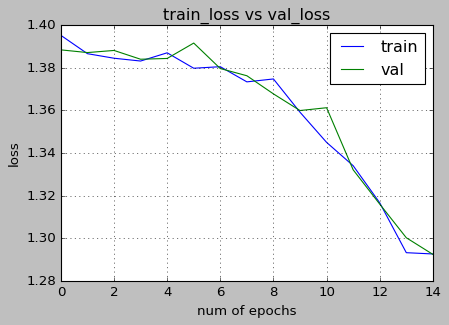

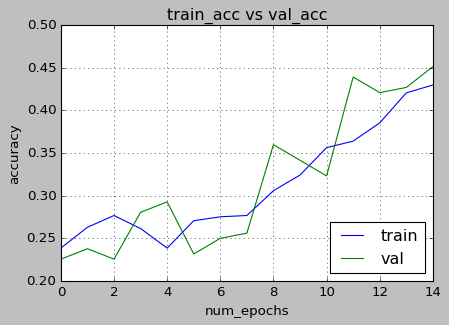

In [122]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

xc=range(num_epoch)

plt.figure(1, figsize=(6,4))
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train', 'val'])
plt.style.use(['classic'])

plt.figure(2, figsize=(6,4))
plt.plot(xc,train_acc)
plt.plot(xc, val_acc)
plt.xlabel('num_epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(["train", 'val'], loc=4)
plt.style.use(['classic'])

In [123]:
import tensorflow
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint

In [124]:
filename='/content/drive/MyDrive/DataFrames/Keras_model_train_new.csv'

csv_log = callbacks.CSVLogger(filename, separator=',', append=False)

early_stopping = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='min')


class CustomCallback(tensorflow.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs.update({'lr': K.eval(self.model.optimizer.lr)})
        keys = list(logs.keys())
        print("Log keys: {}".format(keys)) #you will see now `lr` available

filepath = "/content/drive/MyDrive/Keras_files_callbacks/Best-weights-my_model-{epoch:03d}-{loss:.4f}-{accuracy:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [csv_log, early_stopping, checkpoint]

num_epoch = 20

hist = model.fit(X_train, y_train, batch_size=16, epochs =num_epoch, verbose=1, validation_data=(X_test, y_test),
                 callbacks=callbacks_list)
# [checkpoint, CustomCallback()]

Epoch 1/20
39/41 [===========================>..] - ETA: 0s - loss: 1.2850 - accuracy: 0.4135
Epoch 1: val_loss improved from inf to 1.28360, saving model to /content/drive/MyDrive/Keras_files_callbacks/Best-weights-my_model-001-1.2829-0.4144.hdf5
41/41 [==============================] - 1s 27ms/step - loss: 1.2829 - accuracy: 0.4144 - val_loss: 1.2836 - val_accuracy: 0.4573
Epoch 2/20
39/41 [===========================>..] - ETA: 0s - loss: 1.2528 - accuracy: 0.4551
Epoch 2: val_loss improved from 1.28360 to 1.27821, saving model to /content/drive/MyDrive/Keras_files_callbacks/Best-weights-my_model-002-1.2539-0.4511.hdf5
41/41 [==============================] - 1s 26ms/step - loss: 1.2539 - accuracy: 0.4511 - val_loss: 1.2782 - val_accuracy: 0.4573
Epoch 3/20
40/41 [============================>.] - ETA: 0s - loss: 1.2495 - accuracy: 0.4250
Epoch 3: val_loss improved from 1.27821 to 1.26649, saving model to /content/drive/MyDrive/Keras_files_callbacks/Best-weights-my_model-003-1.2527-

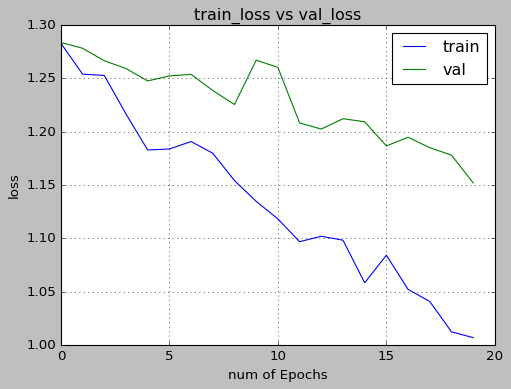

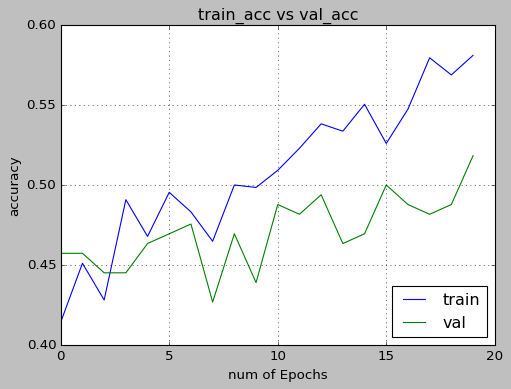

In [125]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(20)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [184]:
# Evaluating the model

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test fraction correct (Accuracy) = {:.2f}".format(accuracy))
print("Test fraction correct (loss) = {:.2f}".format(loss))


test_image = X_test[14:15]
print(test_image.shape)

predict_x = model.predict(test_image) 

classes_x = np.argmax(predict_x,axis=1)

# predict_x =model.predict(X_test) 

# classes_x = np.argmax(predict_x,axis=1)
print(predict_x)
print(classes_x)
# predictions = model.predict_classess(x_test)
# print(model.predict_classes(classes_x))
print(y_test[14:15])


Test fraction correct (Accuracy) = 0.52
Test fraction correct (loss) = 1.15
(1, 128, 128)
[[0.1115351  0.15533781 0.6909011  0.04222598]]
[2]
[[0. 0. 1. 0.]]


In [185]:
# Testing a new image
test_image_1 = cv2.imread('/content/drive/MyDrive/Data/Keras_tutorial/horses/horse-64.jpg')
test_image_1 = cv2.cvtColor(test_image_1, cv2.COLOR_BGR2GRAY)
test_image_1 = cv2.resize(test_image_1,(128,128))
test_image_1 = np.array(test_image_1)
test_image_1 = test_image_1.astype('float32')
test_image_1 /= 255
print (test_image_1.shape)

(128, 128)


In [186]:
if num_channel==1:
	if K.image_data_format() =='th':
		test_image_1= np.expand_dims(test_image_1, axis=1) 
		print(test_image_1.shape)
	else:
		test_image_1 = np.expand_dims(test_image_1, axis=0) 
		print(test_image_1.shape)

(1, 128, 128)


In [187]:
# Predicting the test image

prediction_2 = model.predict(test_image_1)
print(prediction_2)
classes_x = np.argmax(prediction_2,axis=1)
print(classes_x)



[[0.00587746 0.01970012 0.9569258  0.0174966 ]]
[2]


In [188]:
model.layers[0].input

<KerasTensor: shape=(None, 128, 128, 1) dtype=float32 (created by layer 'conv2d_3_input')>

In [189]:
K.learning_phase()

0

In [190]:
model.layers[3].output

<KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'activation_6')>

In [205]:
# Visualizing the intermediate layer

# from keras import backend as K

# with a Sequential model
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[3].output])
layer_output = get_3rd_layer_output([x])[0]

In [210]:
print(np.shape(layer_output))

(818, 14, 14, 32)


In [212]:
# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [214]:
Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(cats)', 'class 1(Dogs)', 'class 2(Horses)','class 3(Humans)']
					
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

[[8.57887976e-03 8.41484293e-02 5.94833009e-02 8.47789407e-01]
 [2.32593101e-02 8.76416788e-02 7.90172517e-01 9.89264920e-02]
 [3.00553262e-01 3.72637898e-01 1.31992459e-01 1.94816411e-01]
 [1.15700513e-01 1.94622800e-01 5.66940904e-01 1.22735865e-01]
 [3.17232162e-01 3.73146564e-01 1.06311180e-01 2.03310058e-01]
 [1.60945863e-01 3.16371053e-01 3.17510068e-01 2.05173090e-01]
 [4.66655046e-01 2.76577920e-01 2.00525269e-01 5.62417209e-02]
 [9.78858098e-02 2.02217802e-01 3.69411707e-01 3.30484629e-01]
 [4.89353269e-01 3.17434967e-01 1.20690577e-01 7.25212321e-02]
 [9.30334814e-03 1.07051857e-01 3.61765921e-02 8.47468197e-01]
 [3.50840658e-01 3.86974603e-01 1.10332116e-01 1.51852667e-01]
 [1.12515382e-01 2.78864473e-01 2.41680920e-01 3.66939306e-01]
 [5.00786483e-01 2.89733768e-01 1.44430861e-01 6.50489107e-02]
 [3.33243161e-01 3.70842040e-01 1.38374135e-01 1.57540679e-01]
 [1.11535080e-01 1.55337811e-01 6.90901101e-01 4.22259830e-02]
 [5.24735034e-01 2.81295419e-01 1.42590567e-01 5.137893

In [215]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[30  8  4  4]
 [22 12  6  3]
 [13  3 19  2]
 [ 3  4  7 24]]


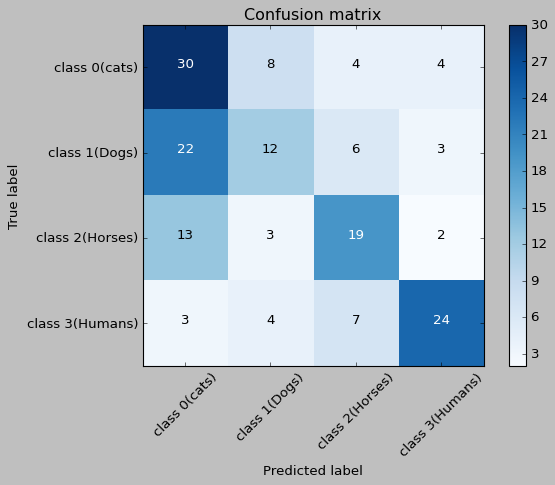

In [216]:
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()


In [221]:
# Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/Keras_files_callbacks/keras_save_weights/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Keras_files_callbacks/keras_save_weights/model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('/content/drive/MyDrive/Keras_files_callbacks/keras_save_weights/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Keras_files_callbacks/keras_save_weights/model.h5")
print("Loaded model from disk")

model.save('/content/drive/MyDrive/Keras_files_callbacks/keras_save_weights/model.h5')
loaded_model=load_model('/content/drive/MyDrive/Keras_files_callbacks/keras_save_weights/model.h5')

Saved model to disk
Loaded model from disk
